In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/persian-artists-on-spotfiy/Spotfiy_Persian_Artists.csv


In [2]:
%pwd

'/kaggle/working'

In [3]:
spotify_df = pd.read_csv("/kaggle/input/persian-artists-on-spotfiy/Spotfiy_Persian_Artists.csv")
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


In [4]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [5]:
spotify_df.artist_name.unique()

array(['Salar Aghili', 'Mohsen Yeganeh', 'Mehdi Yarrahi',
       'Mohammadreza Shajarian', 'Morteza Pashaei', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Mohsen Chavoshi', 'Reza Sadeghi',
       'Abdolhosein Mokhtabad', 'Alireza Assar', 'Roozbeh Nematollahi',
       'Hossein Alizadeh', 'Peyman Yazdanian', 'Kayhan Kalhor',
       'Siavash Ghomayshi', 'Benyamin Bahadori', 'Alireza Eftekhari',
       'Majid Akhshabi', 'Faramarz Aslani', 'Iraj Bastami',
       'Ehsan Khajeh Amiri', 'Alireza Ghorbani', 'Parviz Meshkatian',
       'Mohammad Reza Lotfi', 'Dang Show', 'Nasser Abdollahi',
       'Soheil Nafissi', 'Farhad Mehrad', 'Afshin Moghaddam',
       'Koveyti Poor', 'Mohammad Golriz', 'Abbas Ghaderi',
       'Javad Yassari', 'Sattar', 'Mohsen Sharifian', 'Babak Jahanbakhsh',
       'Mazyar Fallahi', 'Mohammad Alizadeh', 'Farzad Farzin',
       'Ali Zand Vakili', 'Amirabbas Golab', 'Hamid Askari',
       'Mohsen Namjoo', 'Hamed Homayoun', 'Kaveh Deylami', 'Hatam Asgari',
       'Hamid

In [6]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

In [7]:
music_feature_cols = ['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode']

In [10]:
tracks_feature_df = spotify_df[music_feature_cols + ['artist_name']].dropna()
tracks_feature_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode,artist_name
0,0.437,0.390,0,-7.170,0,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor,Salar Aghili
1,0.379,0.146,5,-10.008,1,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major,Salar Aghili
2,0.437,0.453,5,-5.392,0,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor,Salar Aghili
3,0.488,0.138,2,-12.287,0,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor,Salar Aghili
4,0.301,0.443,0,-5.702,0,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10626,0.452,0.381,10,-8.939,1,0.0416,0.940,0.000000,0.1030,0.331,133.289,3,A#,major,A# major,Shahram Nazeri
10627,0.356,0.499,4,-10.805,0,0.0452,0.946,0.005460,0.3530,0.396,146.591,5,E,minor,E minor,Shahram Nazeri
10628,0.318,0.163,5,-17.538,0,0.0690,0.982,0.061400,0.6670,0.161,72.379,3,F,minor,F minor,Shahram Nazeri
10629,0.213,0.218,8,-15.865,1,0.0350,0.883,0.019400,0.2630,0.139,86.645,4,G#,major,G# major,Shahram Nazeri


In [11]:
spotify_df.key_name.isna().sum()

144

In [12]:
tracks_feature_df.drop(['key', 'mode', 'key_mode'], axis=1, inplace=True)

In [13]:
tracks_feature_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,artist_name
0,0.437,0.390,-7.170,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,Salar Aghili
1,0.379,0.146,-10.008,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,Salar Aghili
2,0.437,0.453,-5.392,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,Salar Aghili
3,0.488,0.138,-12.287,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,Salar Aghili
4,0.301,0.443,-5.702,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10626,0.452,0.381,-8.939,0.0416,0.940,0.000000,0.1030,0.331,133.289,3,A#,major,Shahram Nazeri
10627,0.356,0.499,-10.805,0.0452,0.946,0.005460,0.3530,0.396,146.591,5,E,minor,Shahram Nazeri
10628,0.318,0.163,-17.538,0.0690,0.982,0.061400,0.6670,0.161,72.379,3,F,minor,Shahram Nazeri
10629,0.213,0.218,-15.865,0.0350,0.883,0.019400,0.2630,0.139,86.645,4,G#,major,Shahram Nazeri


In [14]:
tracks_feature_df = pd.get_dummies(tracks_feature_df, columns=['key_name', 'mode_name', 'time_signature'])

In [15]:
scaler = StandardScaler()
tracks_feature_df['danceability_norm']      = scaler.fit_transform(tracks_feature_df.danceability.to_numpy().reshape(-1, 1))
tracks_feature_df['energy_norm']           = scaler.fit_transform(tracks_feature_df.energy.to_numpy().reshape(-1, 1))
tracks_feature_df['loudness_norm']         = scaler.fit_transform(tracks_feature_df.loudness.to_numpy().reshape(-1, 1))
tracks_feature_df['speechiness_norm']      = scaler.fit_transform(tracks_feature_df.speechiness.to_numpy().reshape(-1, 1))
tracks_feature_df['acousticness_norm']     = scaler.fit_transform(tracks_feature_df.acousticness.to_numpy().reshape(-1, 1))
tracks_feature_df['instrumentalness_norm'] = scaler.fit_transform(tracks_feature_df.instrumentalness.to_numpy().reshape(-1, 1))
tracks_feature_df['liveness_norm']         = scaler.fit_transform(tracks_feature_df.liveness.to_numpy().reshape(-1, 1))
tracks_feature_df['valence_norm']          = scaler.fit_transform(tracks_feature_df.valence.to_numpy().reshape(-1, 1))
tracks_feature_df['tempo_norm']            = scaler.fit_transform(tracks_feature_df.tempo.to_numpy().reshape(-1, 1))
tracks_feature_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name,...,time_signature_5,danceability_norm,energy_norm,loudness_norm,speechiness_norm,acousticness_norm,instrumentalness_norm,liveness_norm,valence_norm,tempo_norm
0,0.437,0.390,-7.170,0.0299,0.839,0.000035,0.1360,0.330,131.913,Salar Aghili,...,0,-0.434013,-0.438761,0.629692,-0.562138,0.725621,-0.448572,-0.365257,-0.501504,0.423365
1,0.379,0.146,-10.008,0.0414,0.970,0.000360,0.0812,0.346,105.634,Salar Aghili,...,0,-0.770897,-1.446097,0.015542,-0.400505,1.137392,-0.447430,-0.722583,-0.434646,-0.458749
2,0.437,0.453,-5.392,0.0349,0.664,0.002070,0.1100,0.501,94.651,Salar Aghili,...,1,-0.434013,-0.178670,1.014455,-0.491863,0.175545,-0.441422,-0.534791,0.213045,-0.827418
3,0.488,0.138,-12.287,0.0451,0.915,0.006580,0.2120,0.445,110.967,Salar Aghili,...,1,-0.137787,-1.479124,-0.477639,-0.348502,0.964511,-0.425575,0.130305,-0.020960,-0.279735
4,0.301,0.443,-5.702,0.0334,0.657,0.000008,0.1200,0.410,148.053,Salar Aghili,...,0,-1.223948,-0.219955,0.947371,-0.512945,0.153542,-0.448665,-0.469586,-0.167212,0.965140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10626,0.452,0.381,-8.939,0.0416,0.940,0.000000,0.1030,0.331,133.289,Shahram Nazeri,...,0,-0.346888,-0.475917,0.246876,-0.397694,1.043094,-0.448695,-0.580435,-0.497326,0.469553
10627,0.356,0.499,-10.805,0.0452,0.946,0.005460,0.3530,0.396,146.591,Shahram Nazeri,...,1,-0.904489,0.011237,-0.156930,-0.347096,1.061953,-0.429510,1.049704,-0.225714,0.916065
10628,0.318,0.163,-17.538,0.0690,0.982,0.061400,0.6670,0.161,72.379,Shahram Nazeri,...,0,-1.125206,-1.375913,-1.613967,-0.012588,1.175112,-0.232954,3.097158,-1.207696,-1.575027
10629,0.213,0.218,-15.865,0.0350,0.883,0.019400,0.2630,0.139,86.645,Shahram Nazeri,...,0,-1.735082,-1.148850,-1.251926,-0.490457,0.863926,-0.380529,0.462854,-1.299627,-1.096157


In [17]:
tracks_feature_df.drop(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'], axis=1, inplace=True)

(10488, 2)


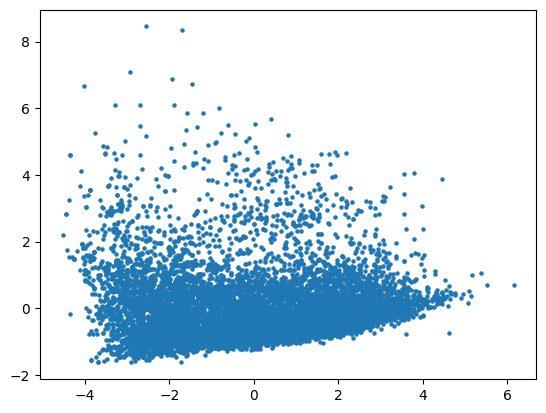

In [20]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

## Prepare Labels

In [26]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh', 
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani', 
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami', 
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

tracks_feature_df['is_sonnati'] = tracks_feature_df.artist_name.map(lambda x: int(x in sonnati_artists), na_action='ignore')
tracks_feature_df.drop(columns=['artist_name'], inplace=True)

In [27]:
tracks_feature_df.describe()

,key_name_A,key_name_A#,key_name_B,key_name_C,key_name_C#,key_name_D,key_name_D#,key_name_E,key_name_F,key_name_F#,...,danceability_norm,energy_norm,loudness_norm,speechiness_norm,acousticness_norm,instrumentalness_norm,liveness_norm,valence_norm,tempo_norm,is_sonnati
count,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,...,1.048800e+04,1.048800e+04,1.048800e+04,1.048800e+04,1.048800e+04,10488.000000,1.048800e+04,1.048800e+04,1.048800e+04,10488.000000
mean,0.115179,0.060355,0.084954,0.145500,0.065027,0.109554,0.036804,0.078185,0.089150,0.048341,...,3.251912e-17,-1.571757e-16,-4.173287e-16,1.083971e-17,-4.823669e-16,0.000000,-1.354963e-16,-1.802101e-16,-4.010691e-16,0.354977
std,0.319253,0.238154,0.278827,0.352621,0.246585,0.312348,0.188289,0.268475,0.284973,0.214496,...,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048,1.000048e+00,1.000048e+00,1.000048e+00,0.478529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.972260e+00,-2.044821e+00,-5.913016e+00,-9.823813e-01,-1.911531e+00,-0.448695,-1.252053e+00,-1.880459e+00,-4.004591e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.999387e-01,-8.227046e-01,-5.644702e-01,-4.749967e-01,-8.806011e-01,-0.448695,-6.286875e-01,-8.149032e-01,-8.129166e-01,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.970392e-02,-2.591872e-02,2.211244e-01,-3.513129e-01,3.578560e-01,-0.448393,-3.913392e-01,-1.296046e-01,2.529098e-02,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.147813e-01,8.162798e-01,7.502821e-01,-3.788692e-02,8.576395e-01,-0.398800,3.585247e-01,7.646264e-01,6.279656e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.626985e+00,2.071321e+00,2.045829e+00,1.221524e+01,1.219118e+00,3.047440,5.216339e+00,2.214618e+00,3.378860e+00,1.000000


In [32]:
x = tracks_feature_df.drop(columns=['is_sonnati']).values
y = tracks_feature_df['is_sonnati'].values

In [33]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10488, 28)
y.shape=(10488,)


### Set a Random Seed

In [34]:
RANDOM_SEED = 42

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=RANDOM_SEED)

## KNN Recommender

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_socre

def fit_and_eval(model, data):
    eval_metrics = {}
    x, y = data
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.4, random_state=RANDOM_SEED
    )
    classifier = make_pipeline(StandardScaler(), model)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    return eval_metrics

fit_and_eval()

In [38]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classification
# sorted(sklearn.neighbors.VALID_METRICS['brute'])
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8055290753098189